<h1>So Basically in this I will be trying out various training algos</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Training_dataset_Original.csv')
leaderboard_dataset = pd.read_csv('Leaderboard_dataset.csv')

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset = dataset.iloc[:, 1:]  #Removing the ID column
leaderboard_dataset = leaderboard_dataset.iloc[:, 1:]

In [4]:
dataset.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset.iloc[:, -2] = labelencoder.fit_transform(dataset.iloc[:, -2])
leaderboard_dataset.iloc[:, -1] = labelencoder.transform(leaderboard_dataset.iloc[:, -1])

In [6]:
#I will remove the garbage values here
for i in range(0, len(dataset.columns)):
    dataset.iloc[:, i] = pd.to_numeric(dataset.iloc[:, i], errors='coerce')

for i in range(0, len(leaderboard_dataset.columns)):
    leaderboard_dataset.iloc[:, i] = pd.to_numeric(leaderboard_dataset.iloc[:, i], errors='coerce')

In [7]:
leaderboard_dataset.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.5001,0.000,0.0,0.0,206.0,19179.0,206.0,14221.0,19438.0,...,1.0,0.0,NaN,20.551,0.42105,3.0,0.85661,NaN,0.0,1
1,1894.0,1.9701,0.000,0.0,0.0,297.0,19820.0,19820.0,176895.0,66346.0,...,3.0,0.0,NaN,63.047,0.00000,15.0,0.94391,0.0,0.0,0
2,1774.0,0.1718,0.000,0.0,0.0,197.0,2563.0,877.0,8869.0,3637.0,...,1.0,0.0,NaN,83.797,0.33333,3.0,0.76467,0.0,0.0,0
3,1586.0,0.1123,5.299,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,1.50000,0.0,NaN,NaN,NaN,0
4,1832.0,1.4442,0.000,0.0,0.0,179.0,7577.0,179.0,21059.0,20306.0,...,3.0,0.0,96.052,66.665,0.00000,23.0,0.79190,0.0,0.0,1


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_leaderboard = leaderboard_dataset.values

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

imputer2 = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer2 = imputer2.fit(X_leaderboard)
X_leaderboard = imputer2.transform(X_leaderboard)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

sc2 = StandardScaler()
X_leaderboard = sc2.fit_transform(X_leaderboard)

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.290048,0.311423,-0.486601,-0.263285,-0.186988,-0.150867,-0.323999,-0.410544,-0.280746,-0.422674,...,-1.082226,-0.207894,0.023551,0.152566,0.900481,-0.881582,0.490171,-0.160451,-0.232353,-0.737028
1,-1.188651,-0.491874,-0.207604,-0.263285,-0.186988,-0.387570,-0.368996,-0.634504,-0.620256,-0.452874,...,-0.576318,-0.207894,0.023551,0.152566,0.003765,-0.881582,1.247076,-0.160451,-0.232353,-0.737028
2,1.821129,-0.658783,-0.486601,-0.263285,-0.186988,3.222066,0.043052,1.416339,7.359761,0.294825,...,0.182544,-0.207894,-6.729958,0.152566,-0.892924,1.506709,1.154157,-0.160451,-0.232353,-0.737028
3,0.327065,-0.618813,-0.486601,-0.263285,-0.186988,0.165345,-0.305448,-0.433571,-0.470355,-0.324490,...,-0.323364,-0.207894,0.023551,0.152566,-0.444566,-0.085485,1.228389,-0.160451,-0.232353,1.356801
4,0.099708,-0.669074,-0.336907,0.209075,-0.186988,0.393518,-0.179532,-0.350652,-0.422692,-0.267643,...,-0.576318,-0.207894,1.688152,-2.254820,-0.764822,-0.244704,-0.660173,-0.160451,-0.232353,1.356801


<h2> Just in case I want to some wrangling here </h2>

<h3> Removal of the various variables and also LDA </h3>

In [13]:
X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

In [14]:
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

In [15]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd.fit(X_train[:, [6,9]])

svd_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd_lBoard.fit(X_leaderboard[:, [6,9]])

X_train[:, [6,9]] = svd.transform(X_train[:, [6,9]])
X_test[:, [6,9]] = svd.transform(X_test[:, [6,9]])
X_leaderboard[:, [6,9]] = svd_lBoard.transform(X_leaderboard[:, [6,9]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]

In [16]:
svd2 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2.fit(X_train[:, [13, 14, 15]])

svd2_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2_lBoard.fit(X_leaderboard[:, [13, 14, 15]])

X_train[:, [13, 14, 15]] = svd2.transform(X_train[:, [13, 14, 15]])
X_test[:, [13, 14, 15]] = svd2.transform(X_test[:, [13, 14, 15]])
X_leaderboard[:, [13, 14, 15]] = svd2_lBoard.transform(X_leaderboard[:, [13, 14, 15]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]

In [17]:
svd3 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3.fit(X_train[:, [14, 15]])

svd3_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3_lBoard.fit(X_leaderboard[:, [14, 15]])

X_train[:, [14, 15]] = svd3.transform(X_train[:, [14, 15]])
X_test[:, [14, 15]] = svd3.transform(X_test[:, [14, 15]])
X_leaderboard[:, [14, 15]] = svd3_lBoard.transform(X_leaderboard[:, [14, 15]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]

In [18]:
svd4 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4.fit(X_train[:, [16, 17]])

svd4_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4_lBoard.fit(X_leaderboard[:, [16, 17]])

X_train[:, [16, 17]] = svd4.transform(X_train[:, [16, 17]])
X_test[:, [16, 17]] = svd4.transform(X_test[:, [16, 17]])
X_leaderboard[:, [16, 17]] = svd4_lBoard.transform(X_leaderboard[:, [16, 17]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]

In [19]:
svd5 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5.fit(X_train[:, [17, 18, 19]])

svd5_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5_lBoard.fit(X_leaderboard[:, [17, 18, 19]])

X_train[:, [17, 18, 19]] = svd5.transform(X_train[:, [17, 18, 19]])
X_test[:, [17, 18, 19]] = svd5.transform(X_test[:, [17, 18, 19]])
X_leaderboard[:, [17, 18, 19]] = svd5_lBoard.transform(X_leaderboard[:, [17, 18, 19]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]

In [20]:
X_train.shape

(60000, 38)

<h3> Okay, so here training using ANN having 2 hidden layers </h3>

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

Using TensorFlow backend.


In [22]:
classifier = Sequential()

In [30]:
#classifier.add(Dropout(rate=0.25, input_shape=(38,)))

In [23]:
classifier.add(Dense(output_dim = 18, init = 'uniform', activation='relu', input_dim=38))

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=38, units=18, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [24]:
#classifier.add(Dropout(rate=0.2, input_shape=(23,)))

In [24]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation='relu'))

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [25]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation='relu'))

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [26]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation='sigmoid'))

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [27]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [28]:
classifier.fit(X_train, y_train, nb_epoch=50)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.4550 - acc: 0.7632
Epoch 2/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.4275 - acc: 0.7988
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.4229 - acc: 0.8003
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.4204 - acc: 0.8012
Epoch 5/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.4190 - acc: 0.8019
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.4180 - acc: 0.8032
Epoch 7/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.4172 - acc: 0.8036
Epoch 8/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.4165 - acc: 0.8039
Epoch 9/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.4159 - acc: 0.8047
Epoch 10/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.4155 - acc: 0.8040

In [29]:
y_pred_test = classifier.predict(X_test)

In [30]:
pd.DataFrame(y_pred_test).describe()

,0
count,2.000000e+04
mean,2.409990e-01
std,2.313173e-01
min,4.205932e-13
25%,4.589199e-02
50%,1.656633e-01
75%,3.784436e-01
max,8.357456e-01


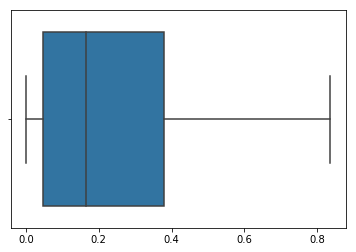

In [31]:
sns.boxplot(y_pred_test)

In [32]:
y_pred_test_copy = y_pred_test
j = 0
for i in y_pred_test_copy:
    if i > 0.5:
        y_pred_test_copy[j] = 1
    else:
        y_pred_test_copy[j] = 0
    j = j+1

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

0.19335

<h3> Okay so here I am going to train RandomFores Classifier for reducing Overfitting </h3>

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
for i in np.arange(0, 5):
    classifier = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth = (5+i),random_state=0)
    
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    j = 0
    for i in y_pred_test:
        if i > 0.5:
            y_pred_test[j] = 1
        else:
            y_pred_test[j] = 0
        j = j + 1
    
    print(mean_squared_error(y_test, y_pred_test))

0.20765
0.20245
0.20035
0.1983
0.19515


In [30]:
#So here I have basically just used n_estimators=100, criterion='entropy', max_depth=12
print(mean_squared_error(y_test, y_pred_test))

0.19225


In [77]:
classifier = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth = (6),random_state=0)
    
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [81]:
classifier.feature_importances_

array([2.01616577e-01, 4.99473998e-02, 4.22570130e-02, 1.52264881e-03,
       1.98742122e-03, 1.10700997e-01, 4.65427200e-02, 9.50823367e-02,
       4.68832719e-02, 8.80907929e-03, 1.86491585e-03, 6.33645788e-03,
       1.26977119e-03, 1.76484504e-02, 1.33713991e-02, 4.15847574e-02,
       1.75137893e-02, 3.27199909e-02, 6.50771027e-02, 7.45940969e-03,
       1.21121724e-03, 7.55783911e-04, 2.62942230e-02, 9.57594996e-04,
       5.44257949e-03, 5.23320582e-03, 5.73167182e-03, 1.40997558e-02,
       6.85725580e-03, 2.36025853e-03, 9.28270184e-04, 6.25713304e-04,
       4.75890354e-02, 3.68245052e-03, 1.77203896e-03, 6.85133659e-05,
       1.18541039e-04, 6.60763816e-02])

**So we can clearly see that some of the features may be removed by seeing the importance of the features using Random Forest Classifier**

[]

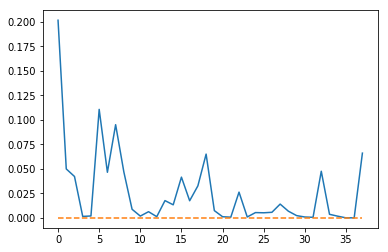

In [86]:
plt.plot(classifier.feature_importances_)
plt.plot(np.arange(0, 38), np.zeros(38), '--')
plt.plot()

In [49]:
#Removing columns 3,22,31,32,35,36
X_train = np.delete(X_train, [3,22,31,32,35,36], 1)
X_leaderboard = np.delete(X_leaderboard, [3,22,31,32,35,36], 1)

In [50]:
X_test = np.delete(X_test, [3,22,31,32,35,36], 1)

In [51]:
X_train.shape

(60000, 32)

In [52]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=8, random_state=0)
classifier.fit(X_train, y_train)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
y_pred_test = classifier.predict(X_test)
j = 0
for i in y_pred_test:
    if i > 0.5:
        y_pred_test[j] = 1
    else:
        y_pred_test[j] = 0
    j = j + 1

mean_squared_error(y_test, y_pred_test)

0.1969

<h3>So I am going to use SVM here </h3>

In [36]:
from sklearn.svm import SVR
classifier = SVR(kernel = 'rbf')

In [ ]:
classifier.fit(X_train, y_train)

In [31]:
y_pred_test = classifier.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

0.1952

<h3> By using the data by the above feature importances I am again going to use Neural Net with same architecture as the first one</h3>

In [89]:
classifier = Sequential()
classifier.add(Dense(output_dim = 18, activation='relu', init='uniform', input_dim=32))
classifier.add(Dense(output_dim = 1, activation='relu', init='uniform'))
classifier.add(Dense(output_dim = 1, activation='sigmoid', init='uniform'))
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=32, units=18, kernel_initializer="uniform")`
  
/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [90]:
classifier.fit(X_train, y_train, nb_epoch = 50)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.4580 - acc: 0.7588
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.4303 - acc: 0.7974
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4255 - acc: 0.7991
Epoch 4/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.4228 - acc: 0.7997
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.4209 - acc: 0.8005
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.4195 - acc: 0.8011
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4183 - acc: 0.8014
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.4175 - acc: 0.8031
Epoch 9/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.4168 - acc: 0.8032
Epoch 10/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.4163 - acc: 0.8035

<h3> Now I am going to start working on the leaderboard dataset </h3>

In [54]:
y_pred_leaderboard = classifier.predict(X_leaderboard)

In [55]:
y_pred_leaderboard = y_pred_leaderboard.reshape(y_pred_leaderboard.shape[0], 1)
y_pred_leaderboard.shape

(25000, 1)

In [56]:
lead = pd.read_csv('Leaderboard_dataset.csv')
final_array = lead.iloc[:, 0].values

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
final_array = final_array.reshape(final_array.shape[0], 1)

In [58]:
final_array.shape

(25000, 1)

In [59]:
final_array = np.append(final_array, y_pred_leaderboard, axis=1)

In [60]:
df = pd.DataFrame(final_array)

In [61]:
df

,0,1
0,350053.0,0.065236
1,350054.0,0.058022
2,350055.0,0.159734
3,350056.0,0.654853
4,350057.0,0.132812
5,350058.0,0.012363
6,350059.0,0.097162
7,350060.0,0.012063
8,350061.0,0.009365
9,350062.0,0.339674


In [62]:
df.describe()

,0,1
count,25000.000000,25000.000000
mean,362552.500000,0.243924
std,7217.022701,0.208373
min,350053.000000,0.009035
25%,356302.750000,0.062834
50%,362552.500000,0.190689
75%,368802.250000,0.380262
max,375052.000000,0.902582


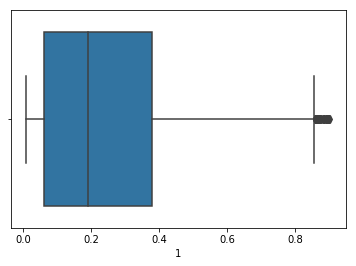

In [63]:
sns.boxplot(df[1])

In [64]:
df2 = df.sort_values([1])

In [65]:
j = 0
for i in df2.iloc[:, 1]:
    if i >0.4:
        df2.iloc[j, 1] = 1
    else:
        df2.iloc[j, 1] = 0
    j = j+1

In [66]:
df2

,0,1
15405,365458.0,0.0
3048,353101.0,0.0
3047,353100.0,0.0
17197,367250.0,0.0
17220,367273.0,0.0
2086,352139.0,0.0
13249,363302.0,0.0
21623,371676.0,0.0
1303,351356.0,0.0
17229,367282.0,0.0


In [67]:
df2.to_csv('Be_Professional_IITRoorkee_33.csv', index = False)